### Problem 1

[0.0, 1.513705285705932, 11.660133509251635, 0.0]
[0.0, 1.513705285705932, 11.660133509251635, 0.0]


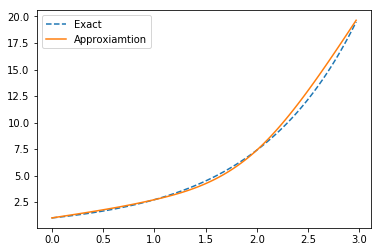

In [3]:
'''
First of all, I'd like to acknowledge Amir O. for helping me debug my index issues.

Name: Daniel Arredondo
Last Edited: 07/15/2020

Triadiagonal Matrix Solver
'''

import numpy as np
import matplotlib.pyplot as mat
import math as m
%matplotlib inline

coordinates = [(0.0,0.0),(1.0,1.0),(2.0,16.0)] #list of vectors, x_j, y_j
test = [0,1,2,3]
testf = []
for x in test:
    testf.append((x,m.exp(x)))
    
def z_node_function(f_array): 
    #input: list of 'coordinates', list whose elements are two values.
    # First we calculate little a, b, c, d
    n = len(f_array)
    a = []
    b = []
    c = []
    d = []
    for i in range(1,n-1):        
        a.append(2*( f_array[i+1][0]-f_array[i-1][0] ))
        d1 = (f_array[i+1][1]-f_array[i][1])/(f_array[i+1][0]-f_array[i][0]) 
        d1 = d1 - (f_array[i][1]-f_array[i-1][1])/(f_array[i][0]-f_array[i-1][0])
        d.append(6*d1)
    for ii in range(1, n-2):
        b.append(f_array[ii+1][0]-f_array[ii][0])
        c.append(f_array[ii][0]-f_array[ii-1][0])
        
    # Next, we calculate our z nodes, substituting our value n
    # for the length of a, such as to avoid calculating the endpoints
    # z_0 and z_n
    
    n = len(a)
    #print(n)
    m = [a[0]]
    y = [d[0]]
    l = []
    
    for j in range(n-1):
        l.append(c[j]/m[j])
        m.append(a[j+1] - l[j]*b[j])
        
    for k in range(1, n):
        y.append(d[k] - l[k-1] * y[k-1])
    
    z = [0]*(n)
    z[-1] = y[-1]/m[-1]
    
    for iii in range(n-2, -1, -1):
        z[iii] = ((y[iii] - b[iii]*z[iii+1])/m[iii] )
    
    z.insert(0,0.0)
    z.append(0.0)
    print(z)
    return z # output: a list of z nodes



def CapitalCoefficients(z_nodes, f_array):
    #inputs: our z nodes and our previously aformentioned 'coordinates'
    #outputs: A list whose elements are lists of A_j, B_j, C_j, D_j for each spline
    n = len(z_nodes)
    A=[]
    B=[]
    C=[]
    D=[]
    for i in range(n-1): #we evaluate our spline coefficients with our given z_j, and each for-loop
                        # represents a different set of coefficients for a different interval on the spline
        A.append((z_nodes[i+1]-z_nodes[i])/(6*(f_array[i+1][0]-f_array[i][0])))
        B.append((0.5)*z_nodes[i])
        C.append((1/(f_array[i+1][0]-f_array[i][0]))*(f_array[i+1][1]-f_array[i][1]) - \
            (1/6)*(f_array[i+1][0]-f_array[i][0])*(z_nodes[i+1]+2*z_nodes[i]))
        D.append(f_array[i][1])
    Cof = [A,B,C,D] #list of lists
    return Cof

# z = z_node_function(coordinates)
# c = CapitalCoefficients(z, coordinates)

tz = z_node_function(testf)
ta = CapitalCoefficients(tz, testf)
# print(tz, ta[0])



def s_j(X, f_array):
    #inputs: X is a list of points where we evalute our spline at, f_array is our 'cooridinate' nodes
    #outpus: a list of size X, which allows us to graph along with X in mat.plot
    z = z_node_function(f_array)
    CapCof = CapitalCoefficients(z, f_array)
    y = []
    for x in X: # we begin the process of evaluating our input value
        que = 0 #this controls a lower bounds in a for loop later for checking
                # where the x value lies between which node
        if (x < f_array[0][0] or x > f_array[len(f_array)-1][0]):
            pass # A quality check. Any input values outside of outside of our nodes are thrown away and no evaluated
        else:
            for k in range(que, len(f_array)): #que changes through false if-statements, resets on each new x input
                if abs(x - f_array[k][0]) < 0.000001: #This is how we check if our input value is actually an
                                                        # interpolation node
                    y.append(f_array[k][1]) # we append the interpolation node
                if x > f_array[k][0] and x < f_array[k+1][0]:# Here we are evaluting our spline with out input x
                    y.append(CapCof[0][k]*(x-f_array[k][0])**3 +\
                        CapCof[1][k]*(x-f_array[k][0])**2 +\
                        CapCof[2][k]*(x-f_array[k][0]) +\
                        CapCof[3][k])
                else: que += 1; #If our x is not within the bounds of x(j) and x(j+1) nodes, we increase the lower
                            # bounds to reevalute the input x at the next set of nodes x(j+1) and x(j+2)
    return y



prec_x = np.arange(0,3,0.03)
prec_f = []
approx_f = s_j(prec_x, testf)
for jk in prec_x:
    prec_f.append(m.exp(jk))

mat.plot(prec_x, prec_f, '--', label='Exact')
mat.plot(prec_x, approx_f, '', label='Approxiamtion')
mat.legend(loc='upper left')
mat.show()

### Problem 2

Spline Graphing

[0.0, 0.039320428702891375, 0.23179835421574355, 2.0972572196142436, -1.8071900908005378, 6.728424761331322, -1.0190512391169801, 0.2476361703205055, 0.0]
[0.0, 1.0743448551050194, -4.96085513931473, 0.04199952355248365, -0.6511897020468728, 2.8576565438941572, 1.1550304915607377, -0.5211854292129106, 0.0]
[0.0, 0.039320428702891375, 0.23179835421574355, 2.0972572196142436, -1.8071900908005378, 6.728424761331322, -1.0190512391169801, 0.2476361703205055, 0.0]
[0.0, 1.0743448551050194, -4.96085513931473, 0.04199952355248365, -0.6511897020468728, 2.8576565438941572, 1.1550304915607377, -0.5211854292129106, 0.0]


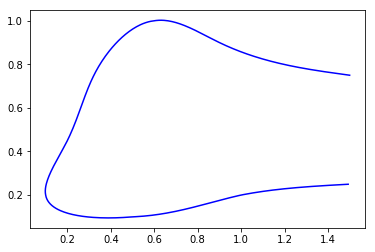

In [12]:
x_j = [(0,1.5) ,(0.618,0.9),(0.935,0.6),(1.255,0.35),(1.636,0.2) ,(1.905,0.1),(2.317,0.5),(2.827,1.0),(3.330,1.5)]
y_j = [(0,0.75),(0.618,0.9),(0.935,1.0),(1.255,0.8) ,(1.636,0.45),(1.905,0.2),(2.317,0.1),(2.827,0.2),(3.330,0.25)]

t_j_x = np.arange(0,3.33,2*0.00333)

x_z = z_node_function(x_j)
y_z = z_node_function(y_j)

#print(len(x_z),len(y_z))

x_cof = CapitalCoefficients(x_z, x_j)
y_cof = CapitalCoefficients(y_z, y_j)

#print(len(x_cof[0]), len(y_cof[0]))

x___s = s_j(t_j_x, x_j)
y___s = s_j(t_j_x, y_j)

#print(len(t_j_x),len(x___s), len(y___s))

mat.plot(x___s, y___s, 'blue')
mat.show()